In [1]:
import pandas as pd
wdc=pd.read_csv("https://bit.ly/2ZCtutn")

In [2]:

wdc.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
wdc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
outliers={}
for i in range(wdc.shape[1]):
    min_t=wdc[wdc.columns[i]].mean()-(3*wdc[wdc.columns[i]].std())
    max_t=wdc[wdc.columns[i]].mean()+(3*wdc[wdc.columns[i]].std())
    count=0
    for j in wdc[wdc.columns[i]]:
        if j<min_t or j>max_t:
            count+=1
            outliers[wdc.columns[i]]=[count,wdc.shape[0]-count]

In [4]:
outliers

{'Fresh': [7, 433],
 'Milk': [9, 431],
 'Grocery': [7, 433],
 'Frozen': [6, 434],
 'Detergents_Paper': [10, 430],
 'Delicassen': [4, 436]}

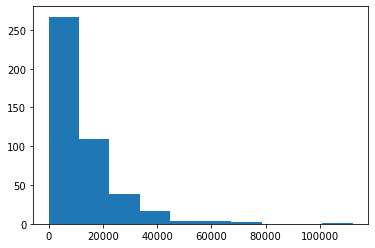

In [7]:
import matplotlib.pyplot as plot
plot.hist(wdc['Fresh'])
plot.show()

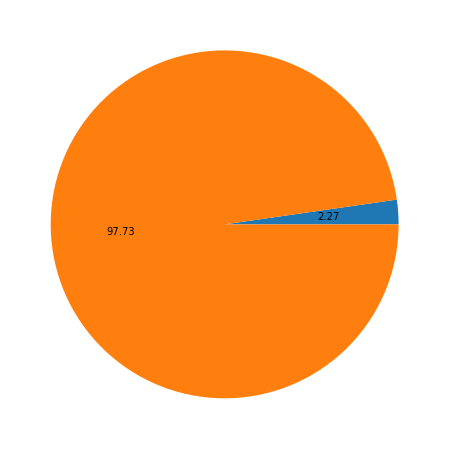

In [10]:
plot.figure(figsize=(8,8))
plot.pie(outliers["Detergents_Paper"],autopct="%.2f")
plot.show()

In [11]:
wdc_standarized=(wdc-wdc.mean())/(wdc.std())

In [12]:
wdc_standarized

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
...,...,...,...,...,...,...,...,...
435,-0.689512,0.589997,1.399719,0.847482,0.849793,2.072862,-0.566186,0.240817
436,-0.689512,0.589997,2.152842,-0.591469,-0.756304,0.296223,-0.584853,0.291170
437,1.447005,0.589997,0.200098,1.313176,2.345716,-0.542762,2.508362,0.121318
438,-0.689512,0.589997,-0.135230,-0.516947,-0.601829,-0.418964,-0.569122,0.212804


In [13]:
from sklearn.cluster import KMeans 


In [58]:
ideal_k=[]
for i in range(1,41):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wdc_standarized)
    ideal_k.append([i,kmeans.inertia_])

In [59]:
ideal_k

[[1, 3511.9999999999977],
 [2, 2593.4778649030577],
 [3, 2144.39921995762],
 [4, 1847.5510319587236],
 [5, 1558.1616958172774],
 [6, 1310.975710179871],
 [7, 1188.5239956268465],
 [8, 1056.7301803714456],
 [9, 980.2822344325416],
 [10, 908.3797399185106],
 [11, 854.866976070159],
 [12, 797.0023540579788],
 [13, 775.0086028058552],
 [14, 737.3897521358398],
 [15, 672.2184546357121],
 [16, 647.9035493651129],
 [17, 626.0811311278082],
 [18, 598.0879043111681],
 [19, 577.066741705313],
 [20, 551.7460566258271],
 [21, 529.9223486355803],
 [22, 505.88552720708736],
 [23, 486.4058139537019],
 [24, 471.1861795626083],
 [25, 446.96152832163625],
 [26, 434.0087818603755],
 [27, 414.8862033350654],
 [28, 405.359114263861],
 [29, 391.326574316924],
 [30, 381.18154808076594],
 [31, 367.6024700201663],
 [32, 359.0076868416096],
 [33, 345.9781852520858],
 [34, 332.631436974537],
 [35, 323.32223079729613],
 [36, 312.1433382628399],
 [37, 303.32901526714807],
 [38, 294.7469403852795],
 [39, 289.354897

In [60]:
import numpy as np
ideal_k=np.array(ideal_k)
ideal_k[:,0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

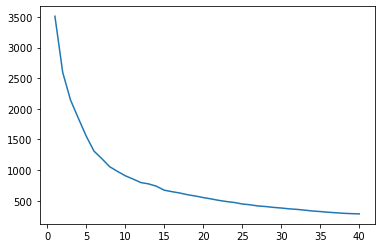

In [61]:
ideal_k
plot.plot(ideal_k[:,0],ideal_k[:,1])
plot.show()

In [40]:
est_means=KMeans(n_clusters=5,random_state=0)
est_means.fit(wdc_standarized)
predict=est_means.predict(wdc_standarized)

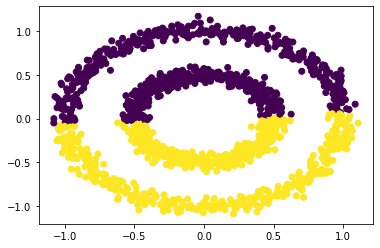

In [131]:
data=pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Machine-Learning-Workshop/master/Chapter02/Exercise2.01/circles.csv')
esti=KMeans(n_clusters=2,random_state=0)
estimated=esti.fit(data)
predict_means=estimated.predict(data)
plot.scatter(data.iloc[:,0],data.iloc[:,1],c=predict_means)
plot.show()


In [132]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score1 = silhouette_score(data, predict_means, metric='euclidean')
kmeans_score2 = calinski_harabasz_score(data, predict_means)
print(kmeans_score1,kmeans_score2)

0.3532973530729835 861.9374736528956


(0.0, 20000.0)

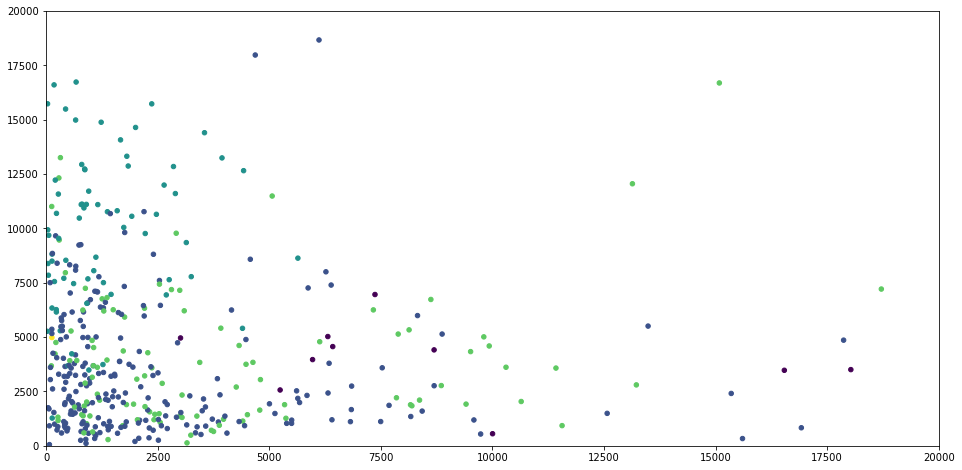

In [74]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,5],wdc.iloc[:,3],c=predict,s=20)
plot.xlim([0,20000])
plot.ylim([0,20000])

(0.0, 20000.0)

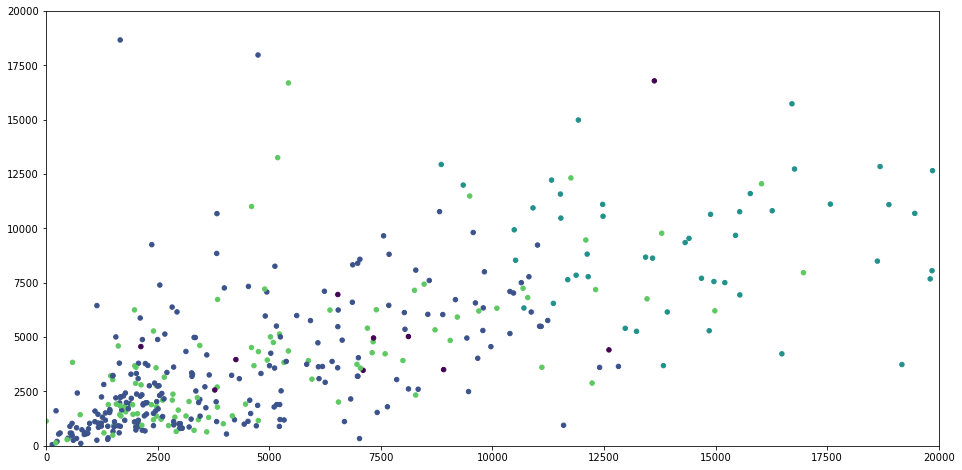

In [75]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,4],wdc.iloc[:,3],c=predict,s=20)
plot.xlim([0,20000])
plot.ylim([0,20000])

(0.0, 20000.0)

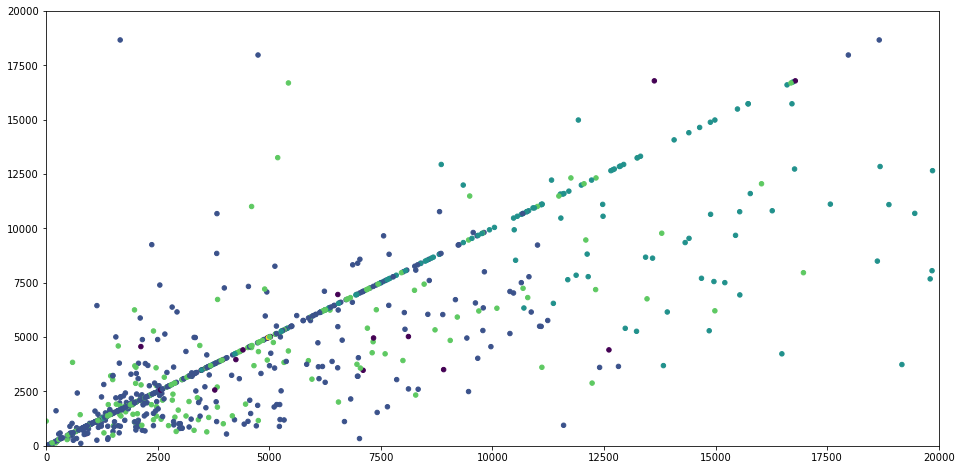

In [85]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,4],wdc.iloc[:,3],c=predict,s=20)
plot.scatter(wdc.iloc[:,3],wdc.iloc[:,3],c=predict,s=20)
plot.xlim([0,20000])
plot.ylim([0,20000])

In [134]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score3 = silhouette_score(wdc, predict, metric='euclidean')
kmeans_score4 = calinski_harabasz_score(wdc, predict)
print(kmeans_score3,kmeans_score4)

0.3832957495230123 215.05783656648813


In [100]:
from sklearn.cluster import MeanShift
estimated_1=MeanShift(bandwidth=0.6,cluster_all=False)
estimated_2=estimated_1.fit(data)
estimated_3=estimated_2.predict(data)

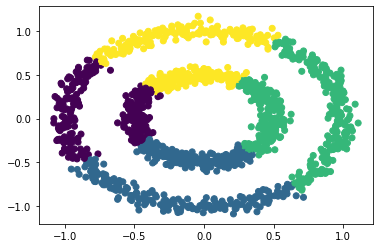

In [101]:
plot.scatter(data.iloc[:,0],data.iloc[:,1],c=estimated_3)

In [136]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score7 = silhouette_score(data, estimated_3, metric='euclidean')
kmeans_score8 = calinski_harabasz_score(data, estimated_3)
print(kmeans_score7,kmeans_score8)

0.36540184159484623 1260.4125810793646


In [139]:
estimated_4=MeanShift(bandwidth=0.4,cluster_all=True)
estimated_5=estimated_4.fit(wdc_standarized)
estimated_6=estimated_5.predict(wdc_standarized)
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score9 = silhouette_score(wdc_standarized, estimated_6, metric='euclidean')
kmeans_score10 = calinski_harabasz_score(wdc_standarized, estimated_6)
print(kmeans_score9,kmeans_score10)

0.0933458034686455 112.90534400805588


(0.0, 20000.0)

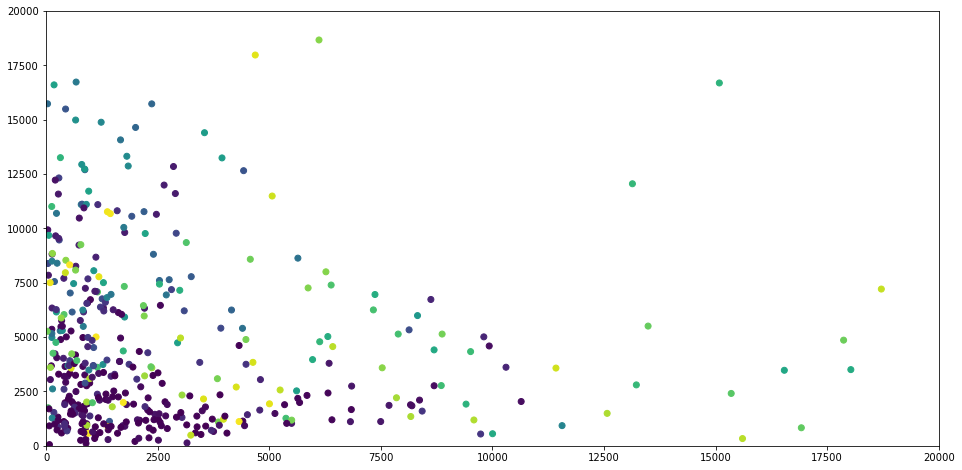

In [107]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,5],wdc.iloc[:,3],c=estimated_6)
plot.xlim([0,20000])
plot.ylim([0,20000])



(0.0, 20000.0)

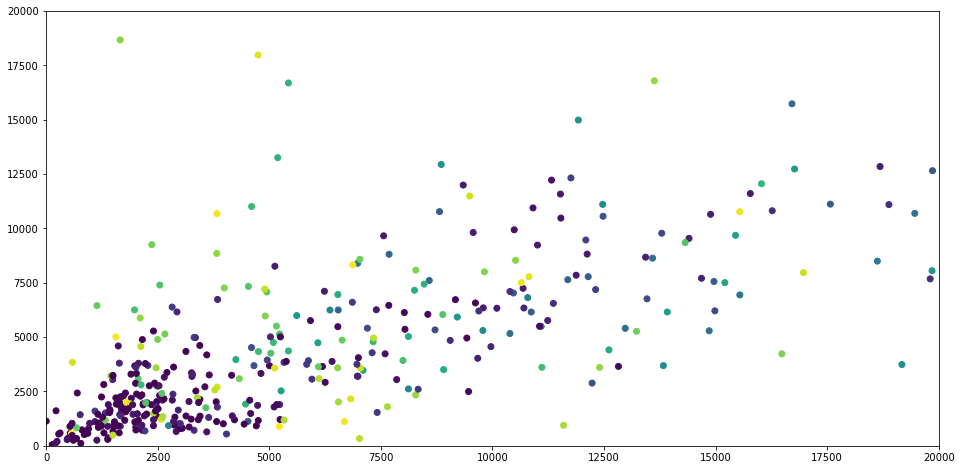

In [108]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,4],wdc.iloc[:,3],c=estimated_6)
plot.xlim([0,20000])
plot.ylim([0,20000])

In [113]:
from sklearn.cluster import DBSCAN
estimated_10=DBSCAN(eps=0.1)
estimated_11=estimated_10.fit_predict(data)

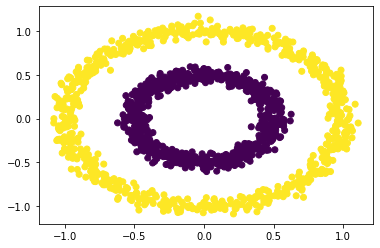

In [114]:
plot.scatter(data.iloc[:,0],data.iloc[:,1],c=estimated_11)

In [122]:
estimated_21=DBSCAN(eps=1)
estimated_22=estimated_21.fit_predict(wdc_standarized)


(0.0, 20000.0)

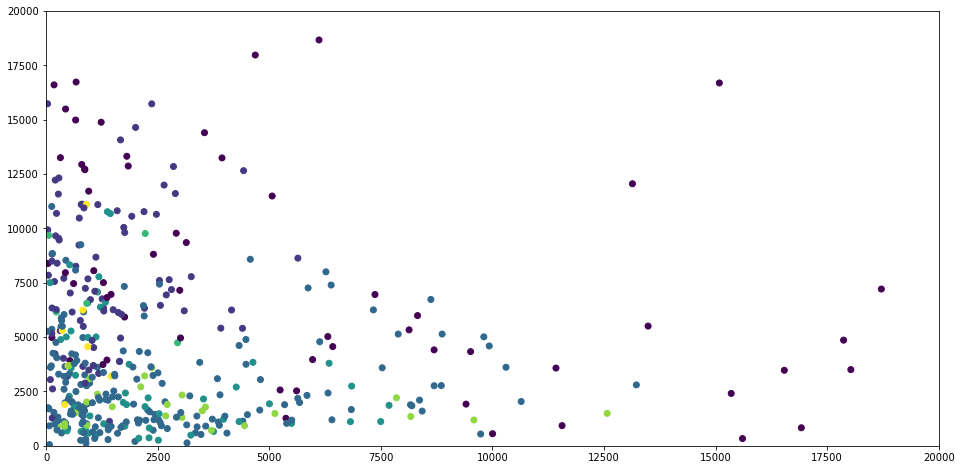

In [124]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,5],wdc.iloc[:,3],c=estimated_22)
plot.xlim([0,20000])
plot.ylim([0,20000])


(0.0, 20000.0)

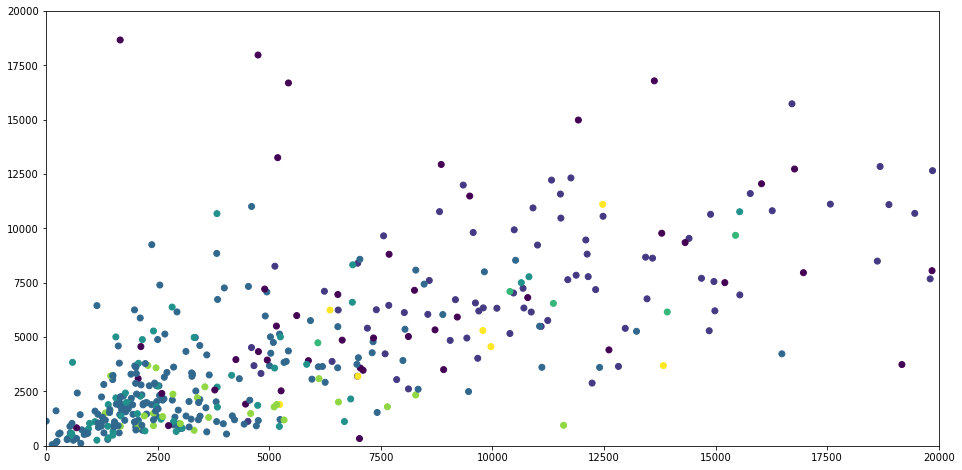

In [125]:
plot.figure(figsize=(16,8))
plot.scatter(wdc.iloc[:,4],wdc.iloc[:,3],c=estimated_22)
plot.xlim([0,20000])
plot.ylim([0,20000])